# Step 01: Regression

In [90]:
import pandas as pd
df1 = pd.read_csv('weight-height.csv')
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [91]:
df2 = df1.copy()

2. Separate x(Gender, Height) and y (y=Weight)
3. Train = 70%, Test = 30%
4. Apply Linear Regression
5. Evaluate the Model (Testing and training Accuracy, MSE for testing)
6. Apply KNN Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
7. Evaluate the Model (Testing and training Accuracy, MSE for testing)
8. Compare KNN & Linear regression with the KNN model and Linear regression as well.


Work from here..

[]

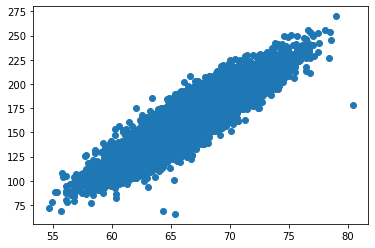

In [92]:
#plot the data
import matplotlib.pyplot as plt
plt.scatter(df2['Height'].values, df2['Weight'].values)
plt.plot()

In [93]:
#2 
# Separate x(Gender, Height) and y (y=Weight)
x = df2.iloc[:,1:-1].values
y =df2.iloc[:, -1].values

In [94]:
x

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [65.58405676],
       [67.42997138],
       [60.92179087]])

In [95]:
y

array([241.8935632, 162.3104725, 212.7408556, ..., 155.9426708,
       151.6784055, 131.2537378])

In [96]:
#Train = 70%, Test = 30%
#import train_test_split liberies
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 10)

In [97]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
lm=regressor.fit(x_train, y_train)

In [98]:
y_predict = lm.predict(x_test)

In [99]:
y_predict

array([167.02640099, 129.22112767, 196.66488066, ..., 185.91038845,
       202.13434668, 201.41809412])

In [100]:
df3 = pd.DataFrame()

In [101]:
y_test

array([164.943303 , 128.4930242, 195.2516665, ..., 194.8206675,
       194.7218564, 201.448679 ])

In [102]:
df3['Actualvalue'] = y_test
df3['Predictvalue']= y_predict
df3['Error'] =df3['Predictvalue'] -  df3['Actualvalue']

In [103]:
df3

,Actualvalue,Predictvalue,Error
0,164.943303,167.026401,2.083098
1,128.493024,129.221128,0.728103
2,195.251666,196.664881,1.413214
3,116.764230,129.339417,12.575187
4,150.016876,163.622064,13.605188
...,...,...,...
2562,201.957972,224.825224,22.867252
2563,175.015091,174.825645,-0.189446
2564,194.820668,185.910388,-8.910279
2565,194.721856,202.134347,7.412490


In [104]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R2 score of testing: ", r2_score(y_test, y_predict))

R2 score of testing:  0.8519511850840664


In [105]:
print("mean_absolute_error: ", mean_absolute_error(y_test, y_predict))

mean_absolute_error:  9.847833100337555


In [106]:
print("mean_squared_error: ", mean_squared_error(y_test, y_predict))

mean_squared_error:  153.47647475548854


In [107]:
#testing MSE
test_mse = mean_squared_error(y_test, regressor.predict(x_test)) #ytest is actual y, reg.predict(xtest) is actually predicted y
test_mse

153.47647475548854

In [108]:
#testing MAE
test_mse = mean_absolute_error(y_test, regressor.predict(x_test))
test_mse

9.847833100337555

In [109]:
#trainin MSE
train_mse = mean_squared_error(y_train, regressor.predict(x_train))
train_mse

151.4707594904329

In [110]:
#trainin MAE
train_mse = mean_absolute_error(y_train, regressor.predict(x_train))
train_mse

9.772622643203832

[]

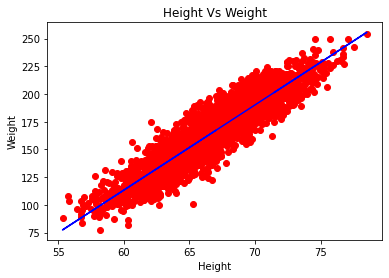

In [111]:
plt.scatter(x_test, y_test, color = 'r')
plt.plot(x_test,lm.predict(x_test), color= 'b')
plt.title("Height Vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot()

[]

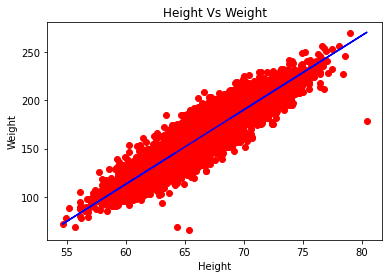

In [112]:
plt.scatter(x_train, y_train, color = 'r')
plt.plot(x_train,lm.predict(x_train), color= 'b')
plt.title("Height Vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot()

Apply KNN Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
Evaluate the Model (Testing and training Accuracy, MSE for testing)
Compare KNN & Linear regression with the KNN model and Linear regression as well.

In [113]:
df4 = df1.copy()

In [114]:
features = df4[['Gender']]
target = df4[['Height']]

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
encoder = LabelEncoder()
features['Gender'] = encoder.fit_transform(features['Gender'])

C:\Users\Tipu Sultan\AppData\Local\Temp\ipykernel_14196\1887744376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Gender'] = encoder.fit_transform(features['Gender'])


In [117]:
features['Gender']

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)


In [119]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [120]:
y_pred = knn_regressor.predict(X_test)

In [121]:
y_pred

array([[65.15419792],
       [68.4673233 ],
       [68.4673233 ],
       ...,
       [65.15419792],
       [68.4673233 ],
       [65.15419792]])

In [122]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R2 score of testing: ", r2_score(y_test, y_pred))

R2 score of testing:  0.4044751678669428


In [123]:
print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred))

mean_absolute_error:  2.3685666652917816


In [124]:
print("mean_squared_error: ", mean_squared_error(y_test, y_pred))

mean_squared_error:  8.779803918251789


In [125]:
#testing MSE
test_mse = mean_squared_error(y_test, knn_regressor.predict(x_test)) #ytest is actual y, reg.predict(xtest) is actually predicted y
test_mse

C:\Users\Tipu Sultan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


17.351434153672447

In [126]:
#testing MAE
test_mse = mean_absolute_error(y_test, knn_regressor.predict(x_test))
test_mse

C:\Users\Tipu Sultan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


3.360599034927932

In [127]:
#trainin MSE
train_mse = mean_squared_error(y_train, knn_regressor.predict(x_train))
train_mse

C:\Users\Tipu Sultan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


17.67646394857933

In [128]:
#trainin MAE
train_mse = mean_absolute_error(y_train, knn_regressor.predict(x_train))
train_mse

C:\Users\Tipu Sultan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


3.3862427607882437

In [129]:
df5 = pd.DataFrame()

In [130]:
df5['Actualvalue'] = y_test
df5['Predictvalue']= y_pred
df5['Error'] =df5['Predictvalue'] -  df5['Actualvalue']

In [131]:
df5

,Actualvalue,Predictvalue,Error
6006,64.846644,65.154198,0.307554
1197,68.886367,68.467323,-0.419043
2862,70.963369,68.467323,-2.496046
6497,62.737189,65.154198,2.417009
2860,69.578030,68.467323,-1.110707
...,...,...,...
184,71.935887,68.467323,-3.468563
2988,67.616383,68.467323,0.850940
6048,58.213614,65.154198,6.940584
420,69.689795,68.467323,-1.222472


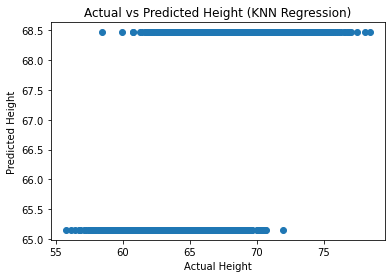

In [132]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Height')
plt.ylabel('Predicted Height')
plt.title('Actual vs Predicted Height (KNN Regression)')
plt.show()

In [134]:
# comparing linear Regression and KNN regression
#Linear Regression
#R2 score of testing:  0.8519511850840664

    
#KNN Regression
#R2 score of testing:  0.4044751678669428

    
# Based on the provided information above, the linear regression model has a higher R2 score on the testing
# data and a higher MSE compared to the KNN regression model. This suggests that the linear
# regression model provides a better fit to the data and performs better in terms of prediction 
# accuracy

# Step 02: Classification

In [135]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


2. Separate x and (y=Gender)
3. Train = 70%, Test = 30%
4. Apply KNN Classifier 
5. Evaluate the Model by only Accuracy.
6. Apply KNN Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Work from here..

In [136]:
x = df2[['Height', 'Weight']]
y = df2['Gender']

In [137]:
x

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [138]:
y

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
8550    Female
8551    Female
8552    Female
8553    Female
8554    Female
Name: Gender, Length: 8555, dtype: object

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [140]:
from sklearn.neighbors import KNeighborsClassifier


In [141]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [142]:
y_pred = knn.predict(x_test)

In [143]:
y_pred

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [144]:
y_train

553       Male
1397      Male
7934    Female
8367    Female
3320      Male
         ...  
5734    Female
5191    Female
5390    Female
860       Male
7270    Female
Name: Gender, Length: 5988, dtype: object

In [145]:
from sklearn.metrics import accuracy_score

In [146]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9131281651733542


In [147]:
df3 = pd.DataFrame()

In [148]:
df3['Actualvalue'] = y_test
df3['Predictvalue']= y_pred

In [149]:
df3.tail(10)

,Actualvalue,Predictvalue
8143,Female,Female
6502,Female,Female
7677,Female,Female
8328,Female,Female
7525,Female,Female
184,Male,Male
2988,Male,Male
6048,Female,Female
420,Male,Male
5669,Female,Female


In [150]:
df2.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [151]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [152]:
test_sample = np.array([[68.781904, 162.310473]])  

In [153]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [154]:
preprocessed_sample = scaler.transform(test_sample)
predicted_class = knn.predict(preprocessed_sample)


C:\Users\Tipu Sultan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Tipu Sultan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [155]:
print("Predicted class:", predicted_class)

Predicted class: ['Female']
